<a href="https://colab.research.google.com/github/Prakharprasun/Flower-Recognizer/blob/main/Flower_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#By: Prakhar Prasun
#We try to make a model that can classify flowers using pandas, numpy, tensorflow, opencv and EfficientNet

In [5]:
import pandas as pd

In [6]:
import tensorflow as tf

In [7]:
#downloading image data from 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [8]:
image_path = tf.keras.utils.get_file(
      'flower_photos',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      untar=True)

In [9]:
import os
import random

data_root = os.path.abspath(image_path)
data_root

'/root/.keras/datasets/flower_photos'

In [10]:
all_image_paths = list(tf.io.gfile.glob(data_root + r'/*/*'))
label_names = sorted(
        name for name in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, name)))

In [11]:
# label encoding

In [12]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))

In [13]:
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [14]:
# reading image using opencv

In [15]:
import cv2
all_image_labels = [
        label_to_index[os.path.basename(os.path.dirname(path))]
        for path in all_image_paths
    ]
all_image = [
        cv2.imread(path)
        for path in all_image_paths
    ]

In [16]:
#lets see image and its label example

2


array([[[14, 15,  5],
        [11, 15,  4],
        [ 8, 13,  4],
        ...,
        [ 3,  9,  4],
        [ 4, 10,  5],
        [ 4, 10,  5]],

       [[15, 16,  7],
        [11, 14,  5],
        [ 8, 12,  6],
        ...,
        [ 4,  9,  7],
        [ 4,  9,  7],
        [ 4,  9,  7]],

       [[15, 15,  9],
        [11, 13,  7],
        [ 8, 12,  7],
        ...,
        [ 3,  8,  6],
        [ 3,  8,  6],
        [ 3,  8,  6]],

       ...,

       [[10, 17, 10],
        [ 8, 15,  8],
        [11, 15, 10],
        ...,
        [18, 28, 15],
        [18, 28, 16],
        [18, 28, 16]],

       [[11, 17, 12],
        [ 9, 15, 10],
        [10, 17, 10],
        ...,
        [18, 28, 15],
        [18, 28, 16],
        [17, 27, 15]],

       [[11, 17, 12],
        [ 9, 15, 10],
        [10, 17, 10],
        ...,
        [18, 28, 15],
        [18, 28, 15],
        [17, 27, 15]]], dtype=uint8)
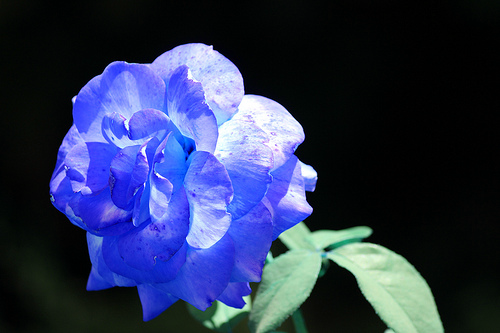

In [17]:
print(all_image_labels[0])
all_image[0]

In [18]:
# resizing it to 224,224 size as too less size may miss details and too big will take more computing time

In [19]:
for i in range(len(all_image)):
    all_image[i] = cv2.resize(all_image[i], (224, 224))

array([[[12, 15,  5],
        [ 9, 13,  7],
        [11, 13,  7],
        ...,
        [ 3,  9,  4],
        [ 3,  9,  5],
        [ 4, 10,  5]],

       [[12, 14,  7],
        [ 8, 12,  7],
        [11, 12,  7],
        ...,
        [ 3,  9,  4],
        [ 3,  8,  6],
        [ 3,  8,  6]],

       [[12, 13,  7],
        [ 8, 12,  7],
        [10, 12,  6],
        ...,
        [ 5,  9,  4],
        [ 2,  8,  3],
        [ 2,  7,  5]],

       ...,

       [[ 9, 14,  8],
        [ 9, 13,  8],
        [ 9, 12,  7],
        ...,
        [18, 28, 15],
        [18, 28, 15],
        [18, 27, 15]],

       [[ 9, 16,  9],
        [ 9, 13,  8],
        [10, 14,  9],
        ...,
        [18, 28, 15],
        [17, 27, 14],
        [18, 28, 16]],

       [[10, 16, 11],
        [ 9, 16,  9],
        [10, 14,  9],
        ...,
        [16, 26, 13],
        [17, 27, 14],
        [18, 27, 15]]], dtype=uint8)
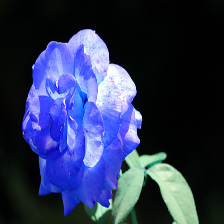

In [20]:
all_image[0]

In [21]:
# initializing X_train and Y_train

In [22]:
X_train=all_image
Y_train=all_image_labels

array([[[12, 15,  5],
        [ 9, 13,  7],
        [11, 13,  7],
        ...,
        [ 3,  9,  4],
        [ 3,  9,  5],
        [ 4, 10,  5]],

       [[12, 14,  7],
        [ 8, 12,  7],
        [11, 12,  7],
        ...,
        [ 3,  9,  4],
        [ 3,  8,  6],
        [ 3,  8,  6]],

       [[12, 13,  7],
        [ 8, 12,  7],
        [10, 12,  6],
        ...,
        [ 5,  9,  4],
        [ 2,  8,  3],
        [ 2,  7,  5]],

       ...,

       [[ 9, 14,  8],
        [ 9, 13,  8],
        [ 9, 12,  7],
        ...,
        [18, 28, 15],
        [18, 28, 15],
        [18, 27, 15]],

       [[ 9, 16,  9],
        [ 9, 13,  8],
        [10, 14,  9],
        ...,
        [18, 28, 15],
        [17, 27, 14],
        [18, 28, 16]],

       [[10, 16, 11],
        [ 9, 16,  9],
        [10, 14,  9],
        ...,
        [16, 26, 13],
        [17, 27, 14],
        [18, 27, 15]]], dtype=uint8)
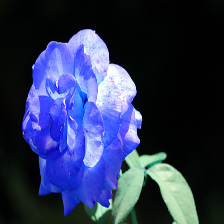

In [23]:
X_train[0]

In [24]:
# converting to np list for further processing

In [25]:
import numpy as np

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = X_train / 255.0

In [26]:
# splitting into train and test data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [28]:
from tensorflow.keras import layers, models


# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(5, activation='softmax')
# ])

In [29]:
#unfortunately CNN gave less accuracy so I tried EfficientNetB0
# a Keras image classification model, optionally loaded with weights pre-trained on ImageNet.

In [30]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [31]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(
    X_train, Y_train,
    epochs=10,
    validation_data=(X_test,Y_test)
)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 153s 672ms/step - accuracy: 0.7323 - loss: 0.6982 - val_accuracy: 0.1417 - val_loss: 1.7524
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 40s 138ms/step - accuracy: 0.9143 - loss: 0.2591 - val_accuracy: 0.1744 - val_loss: 2.3169
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.9441 - loss: 0.1816 - val_accuracy: 0.2534 - val_loss: 2.2380
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.9483 - loss: 0.1617 - val_accuracy: 0.2834 - val_loss: 5.8311
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 138ms/step - accuracy: 0.9621 - loss: 0.1181 - val_accuracy: 0.4959 - val_loss: 2.0474
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.9298 - loss: 0.2086 - val_accuracy: 0.6594 - val_loss: 1.5711
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - accuracy: 0.9511 - loss: 0.1581 - val_accuracy: 0.8501 - val_loss: 0.6099
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.9768 - loss: 

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,558,508 (47.91 MB)

 Trainable params: 4,172,161 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 8,344,324 (31.83 MB)

In [36]:
val_loss, val_acc = model.evaluate(X_test,Y_test)
print(f"Validation Accuracy: {val_acc}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8464 - loss: 0.5428
Validation Accuracy: 0.8446866273880005


In [37]:
def categorize_val_acc(val_acc):
  if val_acc >= 0.90:
    return "Excellent!"
  elif 0.80 <= val_acc < 0.90:
    return "Great!"
  elif 0.70 <= val_acc < 0.80:
    return "Good."
  elif 0.60 <= val_acc < 0.70:
    return "Fair."
  else:
    return "Needs improvement."

print(f"Validation Accuracy appears to be {val_acc}% , which can be considered {categorize_val_acc(val_acc)}")

Validation Accuracy appears to be 0.8446866273880005% , which can be considered Great!
